In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['legend.fontsize'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['font.size'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

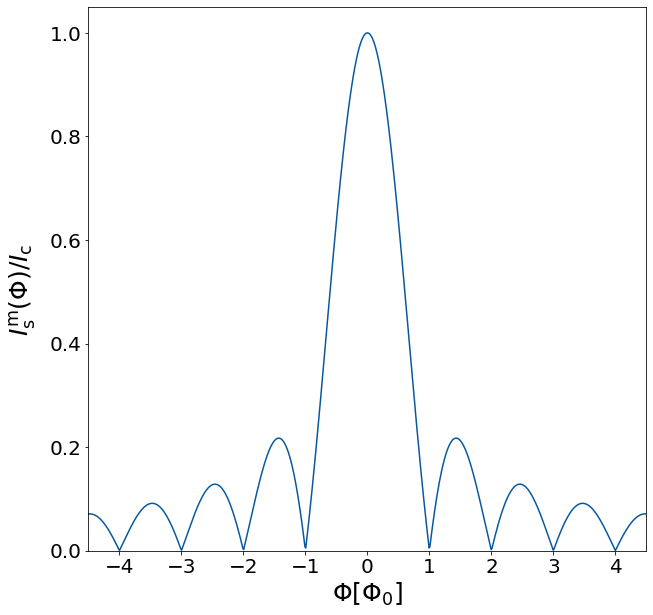

In [64]:
#fraunhofer

phi0 = 2e-15
phi = np.linspace(-5,5,800)*2e-15
def y(phi):
    return np.abs(np.sin(np.pi*phi/phi0)/(np.pi*phi/phi0))

f, ax = plt.subplots()

ax.plot(phi/phi0, y(phi), color='#08589e')
ax.set_xlim(-4.5,4.5)
ax.set_xlabel('$\Phi[\Phi_0]$')
ax.set_ylim(0,1.05)
ax.yaxis.set_label_coords(-0.09, 0.48)
ax.set_ylabel(r'$I_{\rm s}^{\rm m}(\Phi)/I_{\rm c}$')
#ax.set_title('Fraunhofer')
plt.savefig('fraunhofer.pdf')
plt.show()